In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = np.linspace(1,10,25)

In [17]:
f = lambda x : x**2

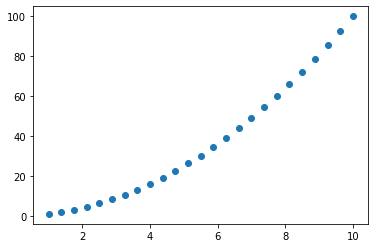

In [20]:
plt.scatter(x, f(x))
plt.show()

In [21]:
from scipy.interpolate import interp1d

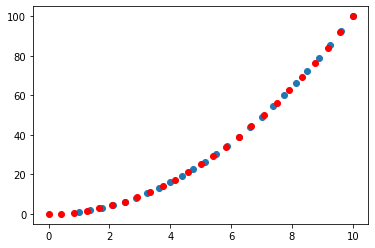

In [22]:
h = interp1d(x,f(x), kind='linear')
nx = np.linspace(0,10,25)
r = f(nx)
plt.scatter(x,f(x))
plt.scatter(nx, r, c='red')
plt.show()

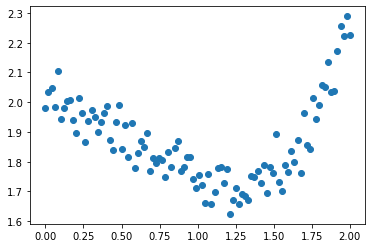

In [30]:
l = np.linspace(0,2,100)
p = 1/3*l**3 - 3/5 * l**2 + 2 + np.random.randn(l.shape[0])/20
plt.scatter(l,p)
plt.show()

In [31]:
from scipy import optimize

In [33]:
def fonction(l,a,b,c,d):
    return a*l**3 + b*l**2 + c*l +d

In [34]:
param, para =optimize.curve_fit(fonction, l, p)

In [35]:
para

array([[ 0.00114205, -0.00342616,  0.00272718, -0.00044307],
       [-0.00342616,  0.01057783, -0.00878025,  0.00152677],
       [ 0.00272718, -0.00878025,  0.00779126, -0.00153457],
       [-0.00044307,  0.00152677, -0.00153457,  0.00041138]])

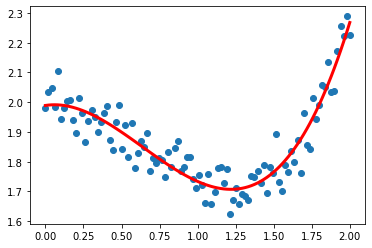

In [36]:
plt.scatter(l,p)
plt.plot(l, fonction(l, param[0], param[1], param[2], param[3]), c='red', lw=3)
plt.show()

In [37]:
func = lambda x: x**2 + 15*np.sin(x)

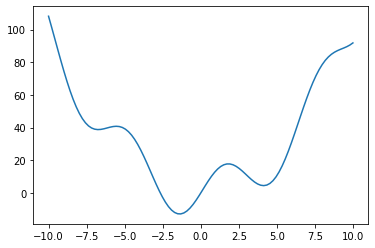

In [38]:
x = np.linspace(-10,10,100)
plt.plot(x,func(x))
plt.show()

In [39]:
optimize.minimize(func, x0=-8)

      fun: 38.81120617595851
 hess_inv: array([[0.11636345]])
      jac: array([-0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-6.7378995])

In [40]:
optimize.minimize(func, x0=-5)

      fun: -12.82361688780436
 hess_inv: array([[0.05978674]])
      jac: array([3.57627869e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([-1.38505581])

In [41]:
minimum = optimize.minimize(func, x0=-5).x
minimum_l = optimize.minimize(func, x0=-8).x

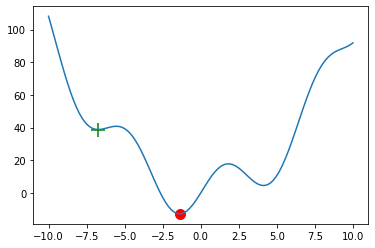

In [42]:
plt.plot(x,func(x))
plt.scatter(minimum,func(minimum), s=100, c='r', zorder=1)
plt.scatter(minimum_l, func(minimum_l), s=200, marker='+', c='g', zorder=1)
plt.show()

# Traitement de Signal

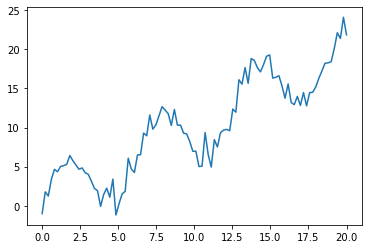

In [43]:
x=np.linspace(0,20,100)
y = x +4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x,y)
plt.show()

In [44]:
from scipy import signal

In [45]:
ny = signal.detrend(y)

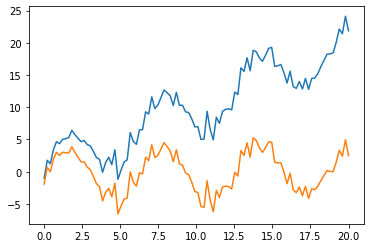

In [46]:
plt.plot(x,y)
plt.plot(x,ny)
plt.show()

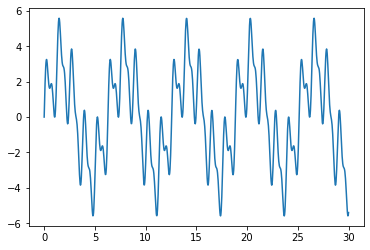

In [64]:
x =np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x,y)
plt.show()

In [65]:
from scipy import fftpack

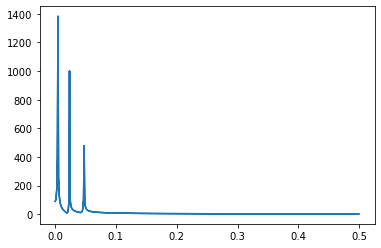

In [66]:
fourier =fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), np.abs(fourier))
plt.show()

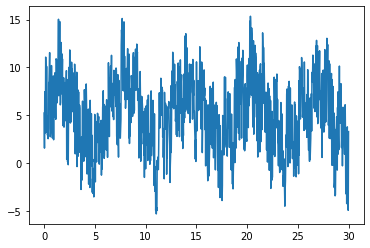

In [68]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x,y)
plt.show()

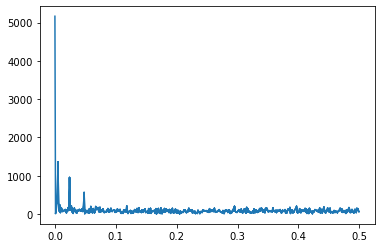

In [69]:
fourier =fftpack.fft(y)
power =np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)
plt.show()

In [70]:
fourier[power<400] =0

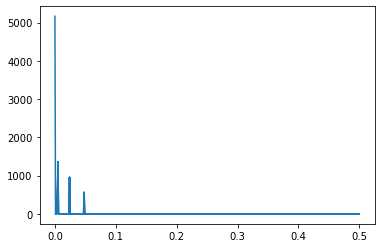

In [71]:
plt.plot(np.abs(frequences), np.abs(fourier))
plt.show()

In [72]:
filtered_signal = fftpack.ifft(fourier)

C:\Users\miken\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


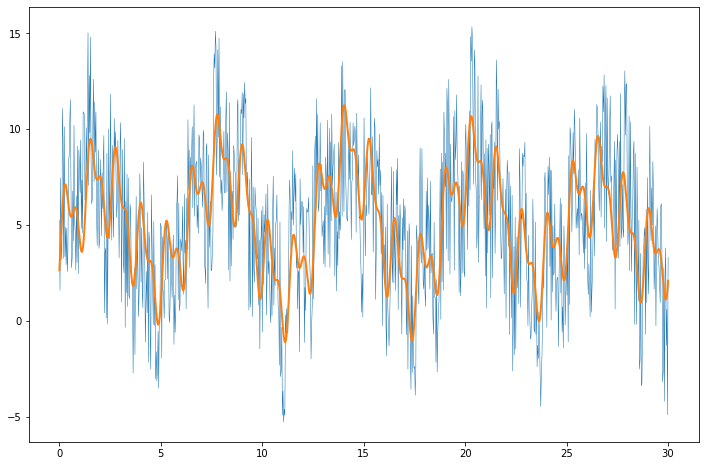

In [75]:
plt.figure(figsize=(12,8))
plt.plot(x,y, lw=0.5)
plt.plot(x, filtered_signal, lw=2)
plt.show()

# Nd Image

In [76]:
from scipy import ndimage

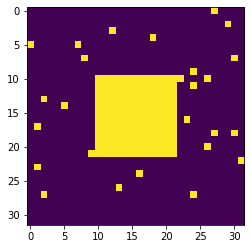

In [79]:
np.random.seed((32,32))
x = np.zeros((32,32))
x[10:-10, 10:-10] = 1
x[np.random.randint(0,32,30), np.random.randint(0,32,30)] =1
plt.imshow(x)
plt.show()

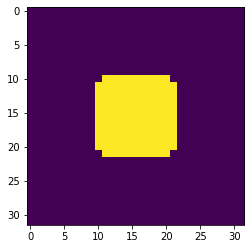

In [81]:
open_x = ndimage.binary_opening(x)
plt.imshow(open_x)
plt.show()

# Traitement d'image

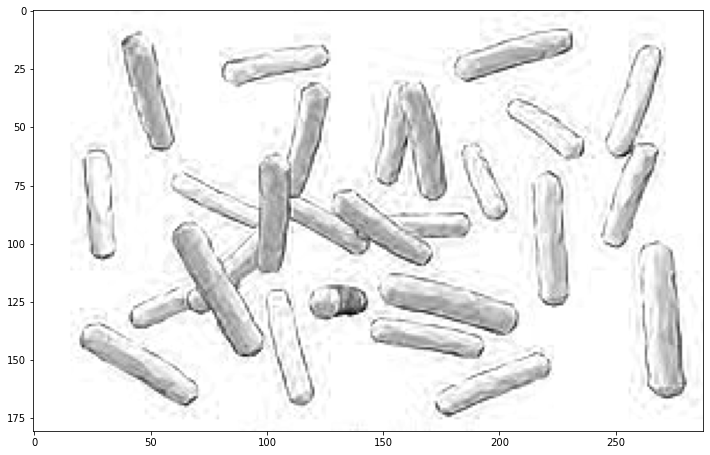

In [89]:
image = plt.imread('bacterie.jpg')
plt.figure(figsize=(12,8))
imagew = image[:,:,0]
plt.imshow(imagew, cmap='gray')
plt.show()

In [90]:
imagew.shape

(181, 288)

In [91]:
cimage =np.copy(imagew)

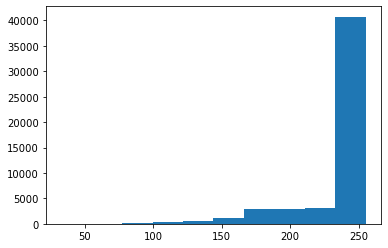

In [96]:
plt.hist(cimage.ravel(), bins=10)
plt.show()

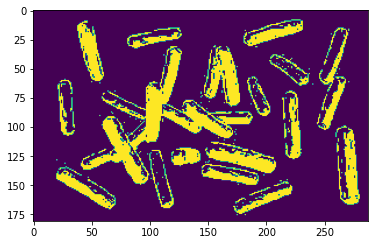

In [111]:
verif = cimage <225
plt.imshow(verif)
plt.show()

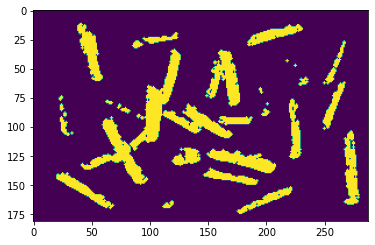

In [112]:
vex  = ndimage.binary_opening(verif)
plt.imshow(vex)
plt.show()

In [113]:
label_image, n_labels = ndimage.label(vex)
print(n_labels)

36


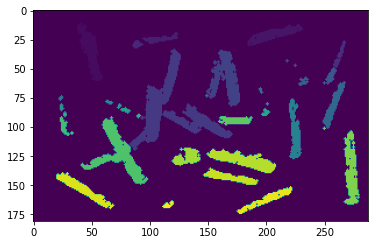

In [114]:
plt.imshow(label_image)
plt.show()

In [115]:
sizes = ndimage.sum(vex, label_image, range(n_labels))

In [116]:
sizes

array([   0.,  483.,  359.,  131.,   43.,   81., 1709.,  700.,    5.,
          5.,   75.,   40.,  250.,   13.,    5.,   12.,  337.,   17.,
          5.,   18.,   11.,   27.,   30.,   11.,   10.,   71.,  852.,
        167.,    5.,  526.,    5.,  237.,  570.,  277.,  388.,  277.])

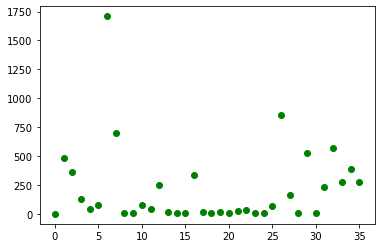

In [118]:
plt.scatter(range(n_labels), sizes, c='g')
plt.show()